In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
sns.set_context("talk")
sns.set_style("ticks")

In [9]:
afr_prs = pd.read_csv("../kaiser/kaiser_afr_prca_prs.txt",sep="\t",index_col = 0)
afr_prs["ANC"] = "AFR"
eur_prs = pd.read_csv("../kaiser/kaiser_eur_prca_prs.txt",sep="\t",index_col = 0)
eur_prs["ANC"] = "EUR"

In [10]:
all_prs = pd.concat([eur_prs,afr_prs])

In [11]:
all_prs["SCORESUM_NORM"] = stats.zscore(all_prs["SCORESUM"])

In [12]:
eur_prs_norm = all_prs.loc[all_prs["ANC"]=="EUR"]
afr_prs_norm = all_prs.loc[all_prs["ANC"]=="AFR"]

In [66]:
def plot_pair_hist(dfs,labels,ax,colors,title):
    for i in range(len(labels)):
        sns.distplot(dfs[i],label=labels[i],hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3},ax=ax,color=colors[i])
        ax.set_xlabel("Empirical PRS",fontsize=18)
        ax.set_ylabel("Density",fontsize=18)
        ax.legend(loc=1,frameon=False)
    ax.set_title(title,fontsize=18)

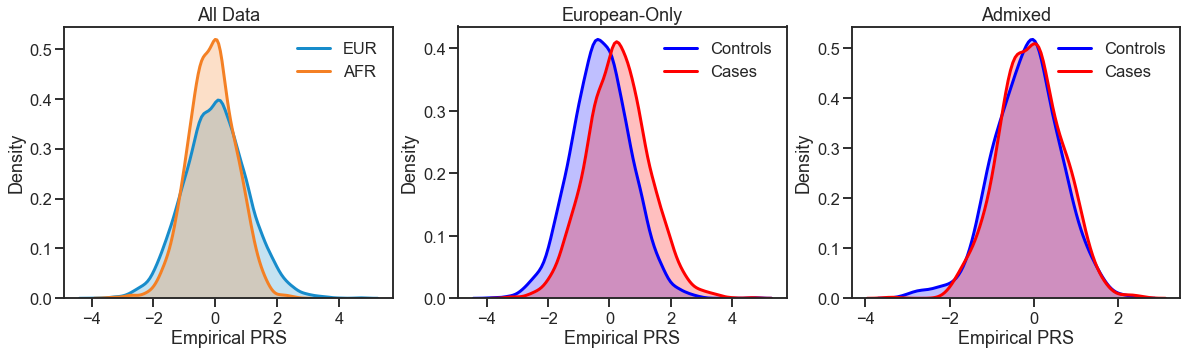

In [69]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(20,5))

plot_pair_hist([eur_prs_norm["SCORESUM_NORM"],afr_prs_norm["SCORESUM_NORM"]],
              ["EUR","AFR"], ax[0], ["#178CCB","#F48024"], "All Data")

plot_pair_hist([eur_prs_norm.loc[eur_prs_norm["PHENO"]==1,"SCORESUM_NORM"],eur_prs_norm.loc[eur_prs_norm["PHENO"]==2,"SCORESUM_NORM"]],
              ["Controls","Cases"],ax[1],["blue","red"], "European-Only")

plot_pair_hist([afr_prs_norm.loc[afr_prs_norm["PHENO"]==1,"SCORESUM_NORM"],afr_prs_norm.loc[afr_prs_norm["PHENO"]==2,"SCORESUM_NORM"]],
              ["Controls","Cases"],ax[2],["blue","red"], "Admixed")

plt.savefig("/Users/taylorcavazos/Desktop/kaiser_prs_dists.pdf",type="pdf",bbox_inches="tight")
plt.show()

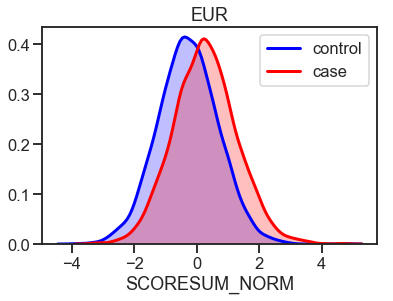

In [17]:
sns.distplot(eur_prs_norm.loc[eur_prs_norm["PHENO"]==1,"SCORESUM_NORM"],color="blue",label="control",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(eur_prs_norm.loc[eur_prs_norm["PHENO"]==2,"SCORESUM_NORM"],color="red",label="case",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
plt.title("EUR")
plt.legend()
plt.show()

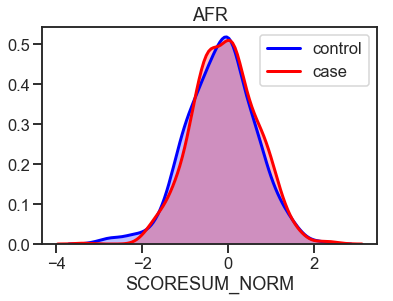

In [18]:
sns.distplot(afr_prs_norm.loc[afr_prs_norm["PHENO"]==1,"SCORESUM_NORM"],color="blue",label="control",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(afr_prs_norm.loc[afr_prs_norm["PHENO"]==2,"SCORESUM_NORM"],color="red",label="case",hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
plt.title("AFR")
plt.legend()
plt.show()